### Natural Language Processing Analysis For Articles Headlines Relating To The Right To Education Act 2009

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
Data = pd.read_csv("~/Desktop/inh.csv")
df = pd.read_csv("~/Desktop/inh.csv", dtype={'publish_date':object})

#### Feature datatype transformation from object to datetime for time series applicability:

In [4]:
df['pub_ym'] = df.publish_date.str[:6]
df['pub_dt_ymd'] = pd.to_datetime(df.publish_date, format='%Y%m%d')
df['pub_dt_ym'] = pd.to_datetime(df.pub_ym, format = '%Y%m')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 6 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       object        
 1   headline_category  object        
 2   headline_text      object        
 3   pub_ym             object        
 4   pub_dt_ymd         datetime64[ns]
 5   pub_dt_ym          datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 156.7+ MB


In [6]:
df

,publish_date,headline_category,headline_text,pub_ym,pub_dt_ymd,pub_dt_ym
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,200101,2001-01-02,2001-01-01
1,20010102,unknown,Fissures in Hurriyat over Pak visit,200101,2001-01-02,2001-01-01
2,20010102,unknown,America's unwanted heading for India?,200101,2001-01-02,2001-01-01
3,20010102,unknown,For bigwigs; it is destination Goa,200101,2001-01-02,2001-01-01
4,20010102,unknown,Extra buses to clear tourist traffic,200101,2001-01-02,2001-01-01
...,...,...,...,...,...,...
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...,202012,2020-12-31,2020-12-01
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...,202012,2020-12-31,2020-12-01
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...,202012,2020-12-31,2020-12-01
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...,202012,2020-12-31,2020-12-01


In [7]:
gby_dt_date = df.groupby(['pub_dt_ymd'])['headline_text'].count()
gby_dt_month  = df.groupby(['pub_dt_ym'])['headline_text'].count()

In [8]:
print(gby_dt_date.head(10),'\n')
print(gby_dt_month.head(10))

pub_dt_ymd
2001-01-02     86
2001-01-03     41
2001-01-04    153
2001-01-05    126
2001-01-06     12
2001-01-07     67
2001-01-08     66
2001-01-09     91
2001-01-10      4
2001-01-23     63
Name: headline_text, dtype: int64 

pub_dt_ym
2001-01-01     1095
2001-02-01     1083
2001-03-01      730
2001-04-01      904
2001-05-01     1721
2001-06-01      859
2001-07-01     4566
2001-08-01    11154
2001-09-01    12037
2001-10-01     7101
Name: headline_text, dtype: int64


## Brief EDA To Capture Basic Temporal Dispersion Of Article Throughput:

### Daily v/s Monthly Article Throughput

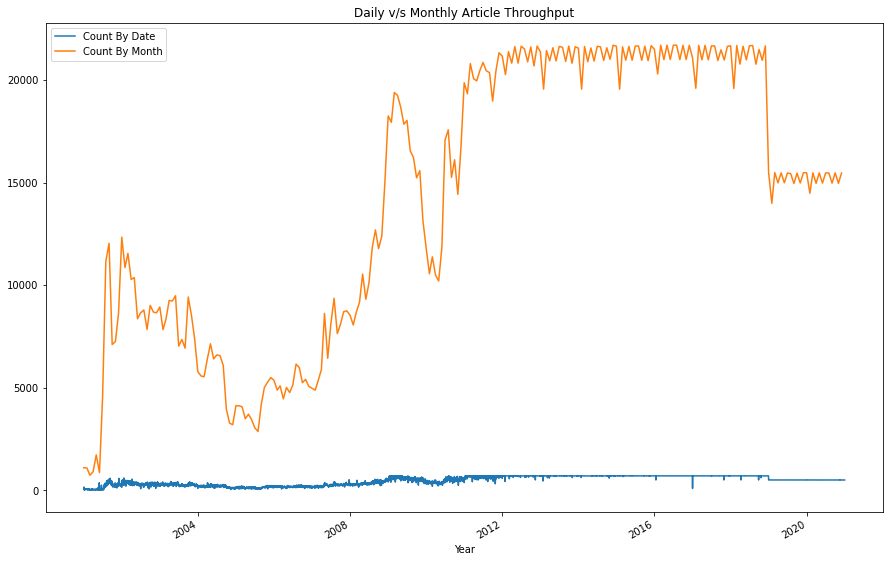

In [117]:
ts = pd.Series(gby_dt_date)
ts.plot(kind = 'line', label = 'Count By Date', figsize = (15,10))
ts = pd.Series(gby_dt_month)
ts.plot(kind = 'line', label = 'Count By Month', figsize = (15,10))
plt.legend(loc = 'upper left')
plt.title("Daily v/s Monthly Article Throughput")
plt.xlabel("Year")
plt.show()

### Yearly Slicing Of Volume & Visualionsation: Grouped By Months  

In [10]:
df

,publish_date,headline_category,headline_text,pub_ym,pub_dt_ymd,pub_dt_ym
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,200101,2001-01-02,2001-01-01
1,20010102,unknown,Fissures in Hurriyat over Pak visit,200101,2001-01-02,2001-01-01
2,20010102,unknown,America's unwanted heading for India?,200101,2001-01-02,2001-01-01
3,20010102,unknown,For bigwigs; it is destination Goa,200101,2001-01-02,2001-01-01
4,20010102,unknown,Extra buses to clear tourist traffic,200101,2001-01-02,2001-01-01
...,...,...,...,...,...,...
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...,202012,2020-12-31,2020-12-01
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...,202012,2020-12-31,2020-12-01
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...,202012,2020-12-31,2020-12-01
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...,202012,2020-12-31,2020-12-01


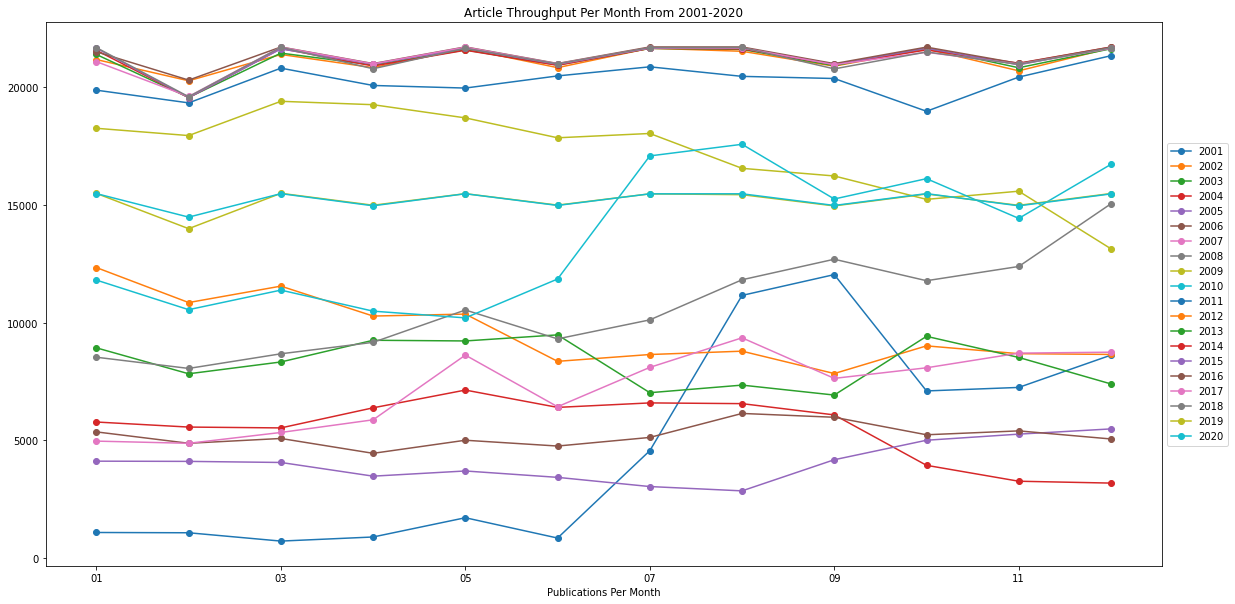

In [11]:
df['pub_mo'] = df.publish_date.str[4:6]
df['pub_y'] = df.publish_date.str[:4]
years = df.pub_y.unique().tolist()
for y in years:
    sliced = df.loc[df.pub_y == y]
    gbymonth = sliced.groupby(['pub_mo'])['headline_text'].count()
    ts_m = pd.Series(gbymonth)
    ts_m.plot(kind='line', figsize=(20,10), style='o-', legend=True, label=y)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Publications Per Month')
plt.title('Article Throughput Per Month From 2001-2020')
plt.show()


### Article Throughput By City News:

In [12]:
cities = df[df.headline_category.str.contains('^city\.[a-z]+$', regex = True)]
cities

,publish_date,headline_category,headline_text,pub_ym,pub_dt_ymd,pub_dt_ym,pub_mo,pub_y
273,20010104,city.bengaluru,Three in race for chief secy's post,200101,2001-01-04,2001-01-01,01,2001
274,20010104,city.patna,Druggists' stir leads to shortage of medicines,200101,2001-01-04,2001-01-01,01,2001
277,20010104,city.bengaluru,He's not so inscrutable,200101,2001-01-04,2001-01-01,01,2001
278,20010104,city.delhi,DPCC stages Nyay rally,200101,2001-01-04,2001-01-01,01,2001
642,20010110,city.patna,Fend for yourselves; Pande tells doctors,200101,2001-01-10,2001-01-01,01,2001
...,...,...,...,...,...,...,...,...
3424059,20201231,city.bengaluru,Azim Premji organisation's name misused to che...,202012,2020-12-31,2020-12-01,12,2020
3424061,20201231,city.bengaluru,Peddler nabbed; 10kg ganja seized in Anantapur...,202012,2020-12-31,2020-12-01,12,2020
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...,202012,2020-12-31,2020-12-01,12,2020
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...,202012,2020-12-31,2020-12-01,12,2020


In [13]:
cities['city_name'] = cities.headline_category.str[5:]
cities

,publish_date,headline_category,headline_text,pub_ym,pub_dt_ymd,pub_dt_ym,pub_mo,pub_y,city_name
273,20010104,city.bengaluru,Three in race for chief secy's post,200101,2001-01-04,2001-01-01,01,2001,bengaluru
274,20010104,city.patna,Druggists' stir leads to shortage of medicines,200101,2001-01-04,2001-01-01,01,2001,patna
277,20010104,city.bengaluru,He's not so inscrutable,200101,2001-01-04,2001-01-01,01,2001,bengaluru
278,20010104,city.delhi,DPCC stages Nyay rally,200101,2001-01-04,2001-01-01,01,2001,delhi
642,20010110,city.patna,Fend for yourselves; Pande tells doctors,200101,2001-01-10,2001-01-01,01,2001,patna
...,...,...,...,...,...,...,...,...,...
3424059,20201231,city.bengaluru,Azim Premji organisation's name misused to che...,202012,2020-12-31,2020-12-01,12,2020,bengaluru
3424061,20201231,city.bengaluru,Peddler nabbed; 10kg ganja seized in Anantapur...,202012,2020-12-31,2020-12-01,12,2020,bengaluru
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...,202012,2020-12-31,2020-12-01,12,2020,jodhpur
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...,202012,2020-12-31,2020-12-01,12,2020,udaipur


In [14]:
city_single = cities.city_name.unique().tolist()
print(city_single)

['bengaluru', 'patna', 'delhi', 'ahmedabad', 'thiruvananthapuram', 'pune', 'mumbai', 'chandigarh', 'lucknow', 'kolkata', 'hyderabad', 'aurangabad', 'nagpur', 'chennai', 'jaipur', 'goa', 'thane', 'hubballi', 'mangaluru', 'mysuru', 'rajkot', 'vadodara', 'surat', 'kanpur', 'varanasi', 'allahabad', 'ludhiana', 'guwahati', 'bhubaneswar', 'ranchi', 'gurgaon', 'coimbatore', 'noida', 'madurai', 'indore', 'kochi', 'kozhikode', 'bhopal', 'nashik', 'raipur', 'visakhapatnam', 'kolhapur', 'navimumbai', 'trichy', 'puducherry', 'bareilly', 'dehradun', 'meerut', 'agra', 'vijayawada', 'jamshedpur', 'imphal', 'shillong', 'amritsar', 'shimla', 'cuttack', 'jind', 'agartala', 'jammu', 'faridabad', 'srinagar', 'salem', 'rajahmundry', 'erode', 'ghaziabad', 'itanagar', 'ajmer', 'kohima', 'gaya', 'jodhpur', 'udaipur', 'amaravati']


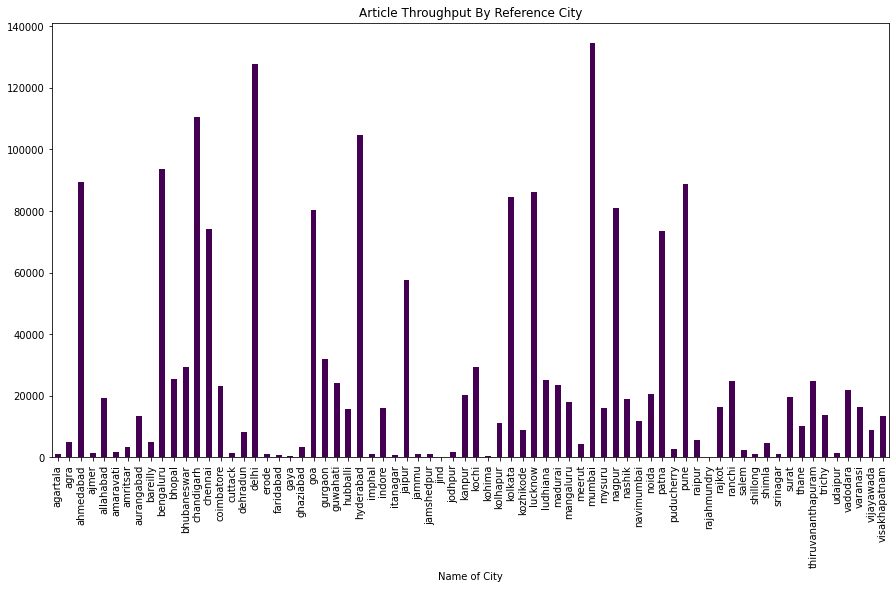

In [124]:
gbycity = cities.groupby(cities['city_name'])['headline_text'].count()
city_ts = pd.Series(gbycity)
city_ts.plot(kind = 'bar', label = 'Article Throughput By Reference City', figsize = (15,8), colormap='viridis')
plt.title('Article Throughput By Reference City')
plt.xlabel('Name of City')
plt.savefig('Art_through_freq')
plt.show()

### Top 50 Cities: Article Throughput By City News

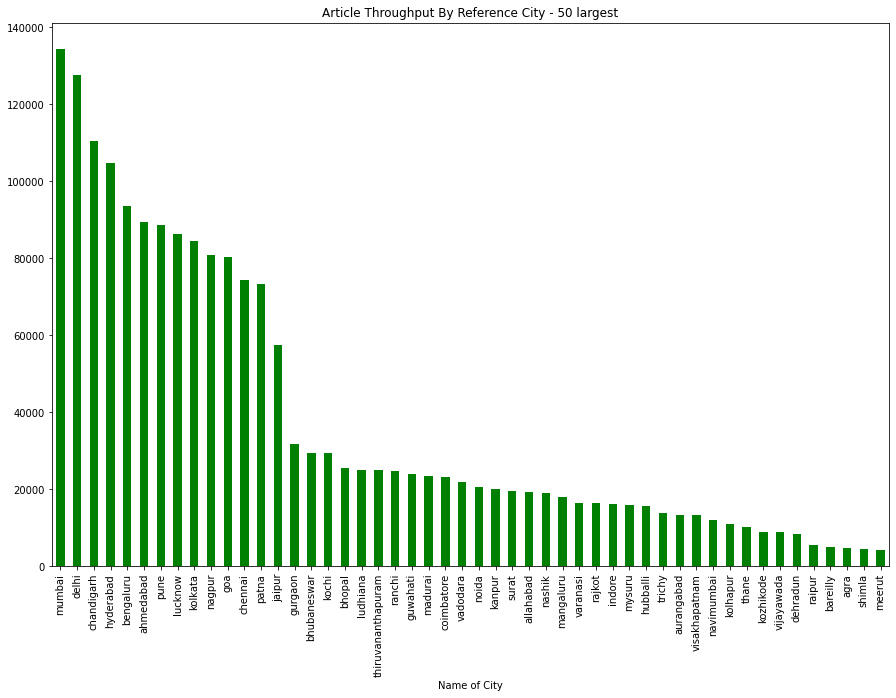

In [126]:
gbycity = cities.groupby(cities['city_name'])['headline_text'].count().nlargest(50)
city_ts = pd.Series(gbycity)
city_ts.plot(kind = 'bar', label = 'Article Throughput By Reference City', figsize = (15,10), color = 'green')
plt.title('Article Throughput By Reference City - 50 largest')
plt.xlabel('Name of City')
plt.savefig('50_largest_cities')
plt.show()

### % Of Referenced Articles By City

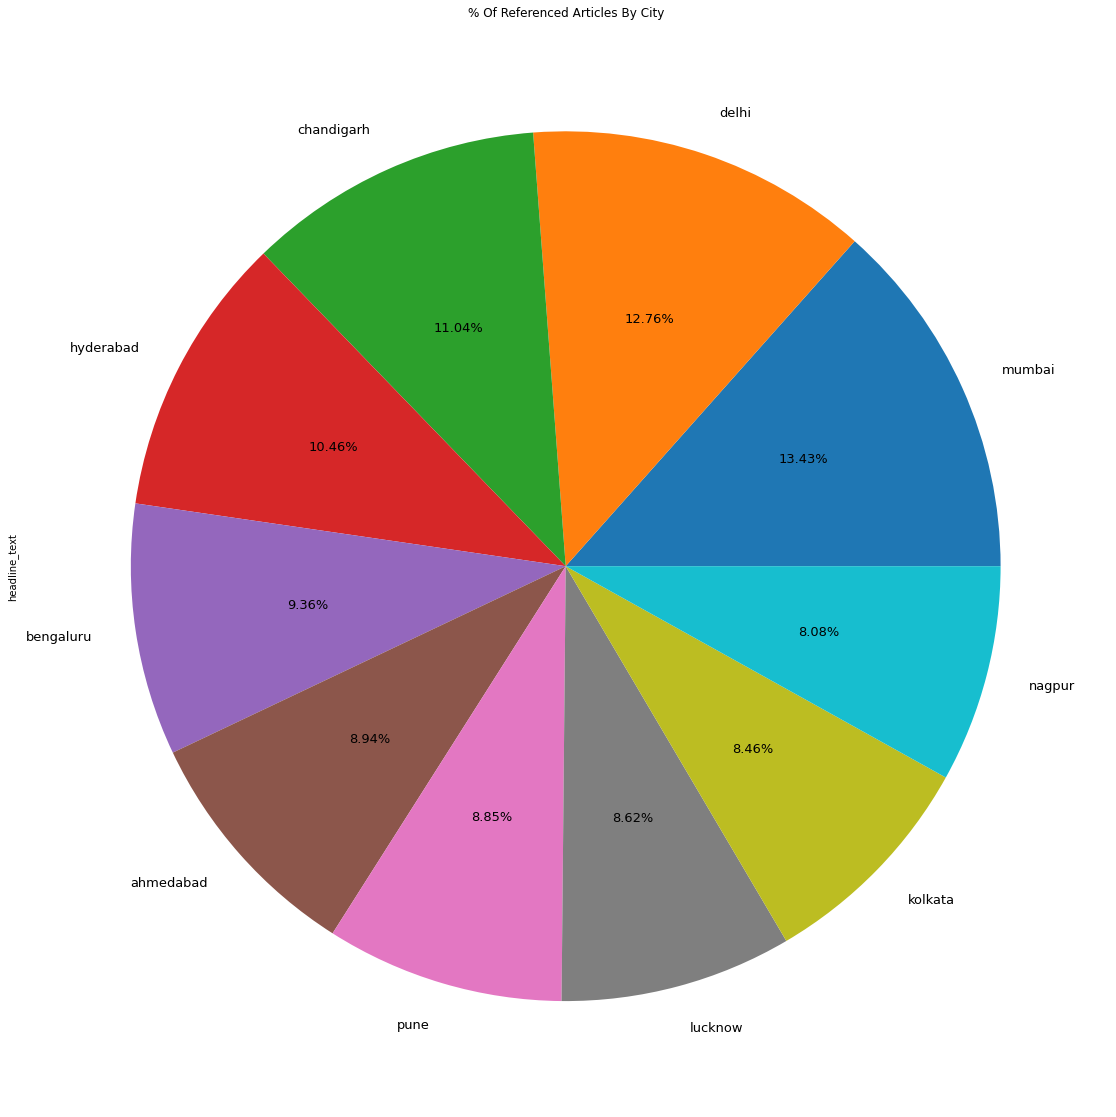

In [139]:
gby_10_city = cities.groupby(['city_name'])['headline_text'].count().nlargest(10)
ts_c10 = pd.Series(gby_10_city)
ts_c10.plot(kind = 'pie', title = '% Of Referenced Articles By City', figsize = (20,20), autopct='%1.2f%%', 
            textprops={'fontsize': 13})

plt.savefig('percentage_city10_target')
plt.show()

### Creating Sub-Dataset For Education Articles:

In [19]:
edu = df[df.headline_category.str.contains('education', regex = False)]

In [20]:
edu

,publish_date,headline_category,headline_text,pub_ym,pub_dt_ymd,pub_dt_ym,pub_mo,pub_y
16581,20010819,home.education,In Jest,200108,2001-08-19,2001-08-01,08,2001
16615,20010819,home.education,Jyotir Vigyan course,200108,2001-08-19,2001-08-01,08,2001
16620,20010819,home.education,Kutiyattam artists felicitated,200108,2001-08-19,2001-08-01,08,2001
16633,20010819,home.education,A humorous innings,200108,2001-08-19,2001-08-01,08,2001
16670,20010819,home.education,Popularity soars,200108,2001-08-19,2001-08-01,08,2001
...,...,...,...,...,...,...,...,...
3422203,20201228,home.education,Promotion without exams will hamper learning: ...,202012,2020-12-28,2020-12-01,12,2020
3422321,20201228,home.education,SPPU: Oral; practical exams of senior colleges...,202012,2020-12-28,2020-12-01,12,2020
3423044,20201229,home.education,Board exams on; dates soon; says Tamil Nadu ed...,202012,2020-12-29,2020-12-01,12,2020
3423395,20201230,home.education,College students panic after Goa CM talks abou...,202012,2020-12-30,2020-12-01,12,2020


In [21]:
edu_gby_dt_date = edu.groupby(['pub_dt_ymd'])['headline_text'].count()
edu_gby_dt_ym = edu.groupby(['pub_dt_ym'])['headline_text'].count()

In [22]:
print(edu_gby_dt_date, '\n')
print(edu_gby_dt_ym, '\n')

pub_dt_ymd
2001-08-19     7
2001-08-20     5
2001-09-01    19
2001-09-02     9
2001-09-09     3
              ..
2020-12-27     1
2020-12-28     2
2020-12-29     1
2020-12-30     1
2020-12-31     1
Name: headline_text, Length: 3162, dtype: int64 

pub_dt_ym
2001-08-01    12
2001-09-01    72
2001-10-01    58
2001-11-01    61
2001-12-01    87
              ..
2020-08-01    59
2020-09-01    67
2020-10-01    33
2020-11-01    25
2020-12-01    35
Name: headline_text, Length: 223, dtype: int64 



### Right To Education Act Media Research - Print & Digital Article

#### Visualising Educaiton Article Throughput With RTE 2009 Time Marks:

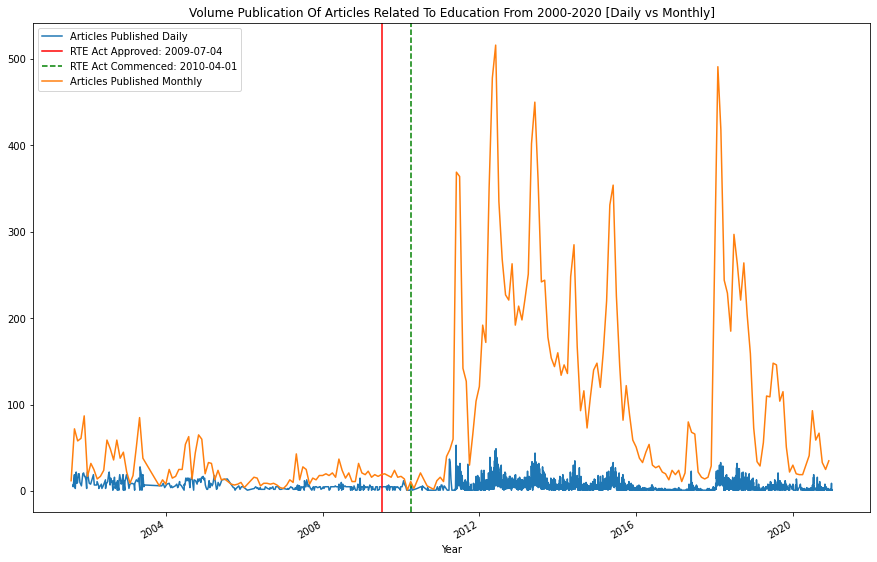

In [132]:
edu_dtd_ts = pd.Series(edu_gby_dt_date)
edu_dtd_ts.plot(kind = 'line', figsize = (15,10), label = 'Articles Published Daily')
plt.axvline(x = '2009-07-04', color = 'red', label = 'RTE Act Approved: 2009-07-04')
plt.axvline(x = '2010-04-01', color = 'green', linestyle = '--', label = 'RTE Act Commenced: 2010-04-01')
edu_dtym_ts = pd.Series(edu_gby_dt_ym)
edu_dtym_ts.plot(kind = 'line', figsize = (15,10), label = 'Articles Published Monthly')
plt.title('Volume Publication Of Articles Related To Education From 2000-2020 [Daily vs Monthly]')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.savefig('eduarts')
plt.show()

In [146]:
edu_texts = edu.headline_text.tolist()
edu_texts

['In Jest',
 'Jyotir Vigyan course',
 'Kutiyattam artists felicitated',
 'A humorous innings',
 'Popularity soars',
 'JIIA Fellowships',
 "Endangering students' lives",
 'Career in cruise catering',
 'Harmonising the laws of nature',
 'College days were great: Rani',
 'CISA equivalent',
 'Learning in the new age promises more',
 'Bright future ahead',
 "Chantal's not all that new",
 'Celebrations',
 'INTERACTIVEbrMPs salary hike',
 'I-Day Celebrations',
 'A Diversified',
 'Red HotbrPMs unfulfilled promise',
 'FIRST PERSONbrNID launches PGD in New Media',
 'SCHOLARSHIP WATCHbrThe Gates Cambridge Scholarships',
 'CAREER OPTIONbrService with a smile',
 'Star gazing in the cosmos',
 'THE COUNSELLORbrDistance Learning',
 'NIEbrAction Green',
 'LOCAL VOCALbrHindu keeps pace',
 'Data Interpretation',
 'KNOWLEDGE SOCIETYbrFuturistic technology',
 'A sunrise sector',
 'IN PERSONbrPay Revision Awaited',
 'NEWSPAPER IN EDUCATIONbrIndo Pak Friendship A mission possible',
 'It is election time at D

In [147]:
join_edu_texts = " ".join(edu_texts)
join_edu_texts

"In Jest Jyotir Vigyan course Kutiyattam artists felicitated A humorous innings Popularity soars JIIA Fellowships Endangering students' lives Career in cruise catering Harmonising the laws of nature College days were great: Rani CISA equivalent Learning in the new age promises more Bright future ahead Chantal's not all that new Celebrations INTERACTIVEbrMPs salary hike I-Day Celebrations A Diversified Red HotbrPMs unfulfilled promise FIRST PERSONbrNID launches PGD in New Media SCHOLARSHIP WATCHbrThe Gates Cambridge Scholarships CAREER OPTIONbrService with a smile Star gazing in the cosmos THE COUNSELLORbrDistance Learning NIEbrAction Green LOCAL VOCALbrHindu keeps pace Data Interpretation KNOWLEDGE SOCIETYbrFuturistic technology A sunrise sector IN PERSONbrPay Revision Awaited NEWSPAPER IN EDUCATIONbrIndo Pak Friendship A mission possible It is election time at DU The Counsellor Australia beckons Making it to the global top league in IT education Bhavishya Jyoti Moulding a generation T

In [151]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
t = join_edu_texts.split(' ')
cleaned = [i for i in t if i.lower() not in stopwords.words('english')]
freq1 = nltk.FreqDist(cleaned)
top50 = freq1.most_common(100)
top50 = pd.DataFrame(top50, columns=['Word', 'Frequency'])
top50.to_excel('Top_100_Most_Frequently_Used_Words_Only_edu.xlsx')
top50

[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Word,Frequency
0,students,1553
1,University,1464
2,exam,860
3,CBSE,741
4,schools,610
...,...,...
95,student,141
96,RTE,141
97,Recruitment,141
98,lakh,140


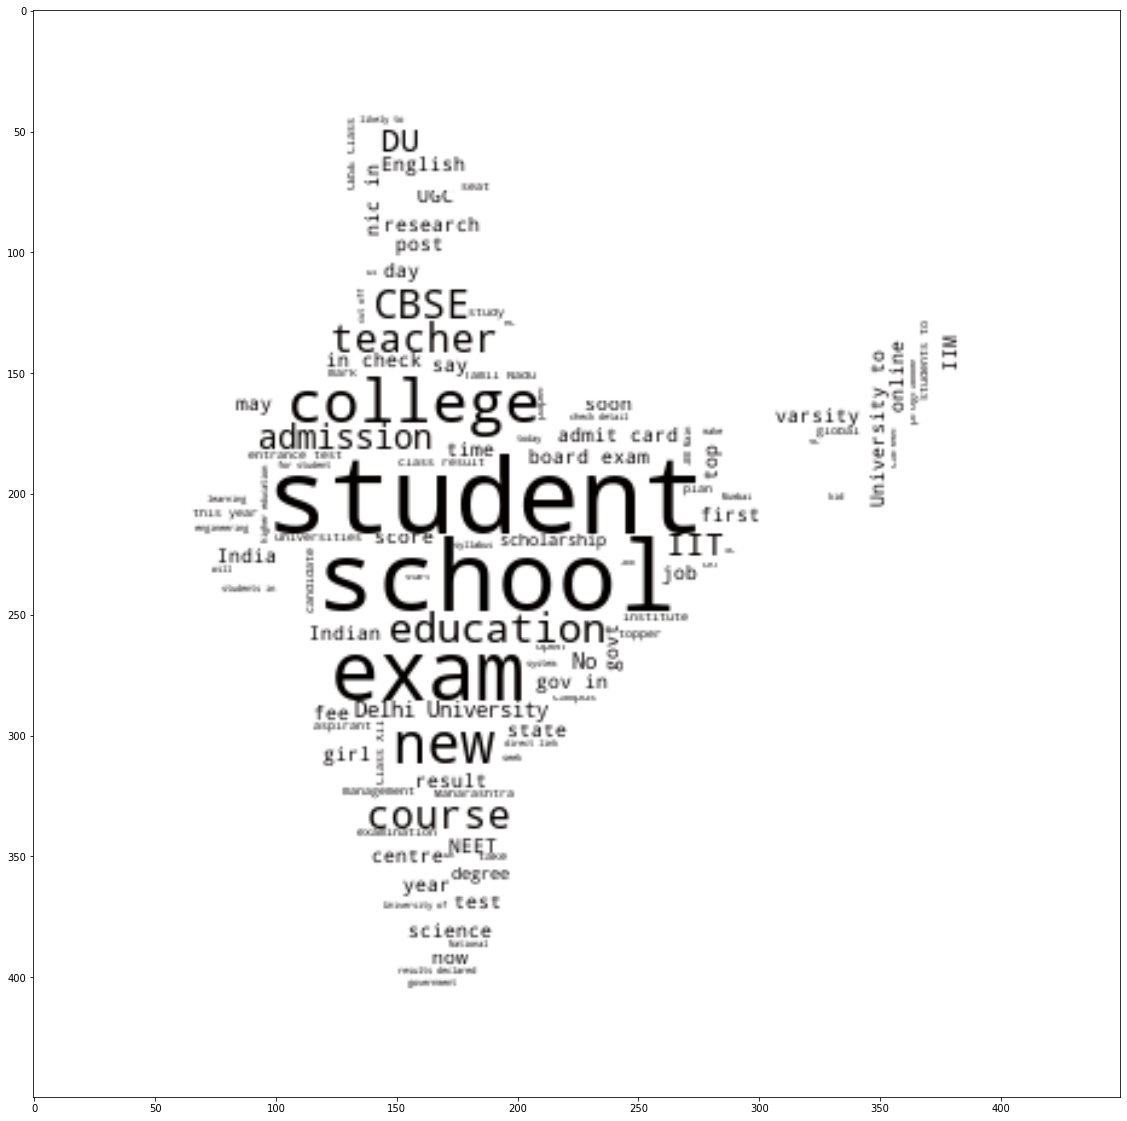

In [149]:
stopwords = set(STOPWORDS)
mask = np.array(Image.open("/Users/user/Desktop/India.PNG"))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(join_edu_texts)
plt.figure(figsize=[20,20])
wordcloud.recolor(color_func = black_color_func)
plt.imshow(wordcloud, interpolation="bilinear")
plt.savefig('IndiaEduFinal_Onlyl_edu')

### The task involved indentifying and isolating datapoints in the main dataset that have the following words in the headline_text feature: 

**1. Quota** 

**2. EWS (Economically Weaker Sections)**

**3. Caste** 

edu_caste and RTE_art were created as run through sub-datasets to identify appropriate process to capture targetted values from the main dataset.

In [26]:
edu_caste = edu[edu.headline_text.str.contains('caste', regex = False)]
edu_caste

,publish_date,headline_category,headline_text,pub_ym,pub_dt_ymd,pub_dt_ym,pub_mo,pub_y
542244,20080121,home.education,Applications increasing at Lancaster,200801,2008-01-21,2008-01-01,01,2008
1385972,20120606,home.education,UGC fights caste bias; links it to recognition,201206,2012-06-06,2012-06-01,06,2012
2822418,20180126,home.education,PhD scholar alleges caste bias; threatens suicide,201801,2018-01-26,2018-01-01,01,2018
3007642,20181018,home.education,Jail term for candidates who submit fake caste...,201810,2018-10-18,2018-10-01,10,2018


In [145]:
RTE_art = edu[edu.headline_text.str.contains('Right to Education Act', regex = False)]
RTE_art.to_excel('RTE_ART.xlsx')
RTE_art

,publish_date,headline_category,headline_text,pub_ym,pub_dt_ymd,pub_dt_ym,pub_mo,pub_y
1348036,20120412,home.education,SC upholds constitutional validity of Right to...,201204,2012-04-12,2012-04-01,04,2012
1350281,20120416,home.education,Right to Education Act burden will not be pass...,201204,2012-04-16,2012-04-01,04,2012
1376761,20120524,home.education,Girls get preference under Right to Education ...,201205,2012-05-24,2012-05-01,05,2012
1405073,20120703,home.education,No Catholic school in Bhopal under Right to Ed...,201207,2012-07-03,2012-07-01,07,2012
1561305,20130213,home.education,Is Right to Education Act applicable to nurser...,201302,2013-02-13,2013-02-01,02,2013
1591447,20130329,home.education,Most states to miss March 31 deadline for comp...,201303,2013-03-29,2013-03-01,03,2013
2461203,20160826,home.education,IB school says it does not come under Right to...,201608,2016-08-26,2016-08-01,08,2016


In [27]:
RTE_gbydt = RTE_art.groupby(['pub_dt_ymd'])['headline_text'].count()
RTE_gbymo = RTE_art.groupby(['pub_dt_ym'])['headline_text'].count()
RTE_gbymo

pub_dt_ym
2012-04-01    2
2012-05-01    1
2012-07-01    1
2013-02-01    1
2013-03-01    1
2016-08-01    1
Name: headline_text, dtype: int64

#### Targetted_articles is the sub-dataset that isolates only those datapoints that have the target words in the headline_text feature.

In [98]:
targetted_articles = edu[(edu.headline_text.str.contains('quota', regex = False)) | (edu.headline_text.str.contains('Quota', regex = False))|
   (edu.headline_text.str.contains('caste', regex = False))|
                         (edu.headline_text.str.contains('Caste', regex = False))|
                         (edu.headline_text.str.contains('Right to Education Act', regex = False))|
                         (edu.headline_text.str.contains('EWS', regex = False))] 

In [144]:
targetted_articles.to_excel('Target_articles.xlsx')
targetted_articles

,publish_date,headline_category,headline_text,pub_ym,pub_dt_ymd,pub_dt_ym,pub_mo,pub_y
22570,20010901,home.education,NEWSPAPER IN EDUCATIONbrIndo Pak Friendship A ...,200109,2001-09-01,2001-09-01,09,2001
37460,20011015,home.education,NEWSPAPER IN EDUCATION British School stage pl...,200110,2001-10-15,2001-10-01,10,2001
45197,20011118,home.education,NEWSPAPER IN EDUCATION Amity Schools celebrate...,200111,2001-11-18,2001-11-01,11,2001
46999,20011125,home.education,NEWSPAPER IN EDUCATION,200111,2001-11-25,2001-11-01,11,2001
49369,20011204,home.education,NEWSPAPER IN EDUCATION,200112,2001-12-04,2001-12-01,12,2001
...,...,...,...,...,...,...,...,...
3155082,20190711,home.education,MBBS admission 2019: Aspirants challenge Marat...,201907,2019-07-11,2019-07-01,07,2019
3164061,20190729,home.education,45 medical seats from all India quota returns ...,201907,2019-07-29,2019-07-01,07,2019
3332733,20200701,home.education,NEET quota for Tamil Nadu govt students: Gover...,202007,2020-07-01,2020-07-01,07,2020
3340986,20200718,home.education,OBC quota seats for MBBS: Madras HC verdict on...,202007,2020-07-18,2020-07-01,07,2020


#### Visualisation Of Article Throughput Pertaining To Target Words By Year:

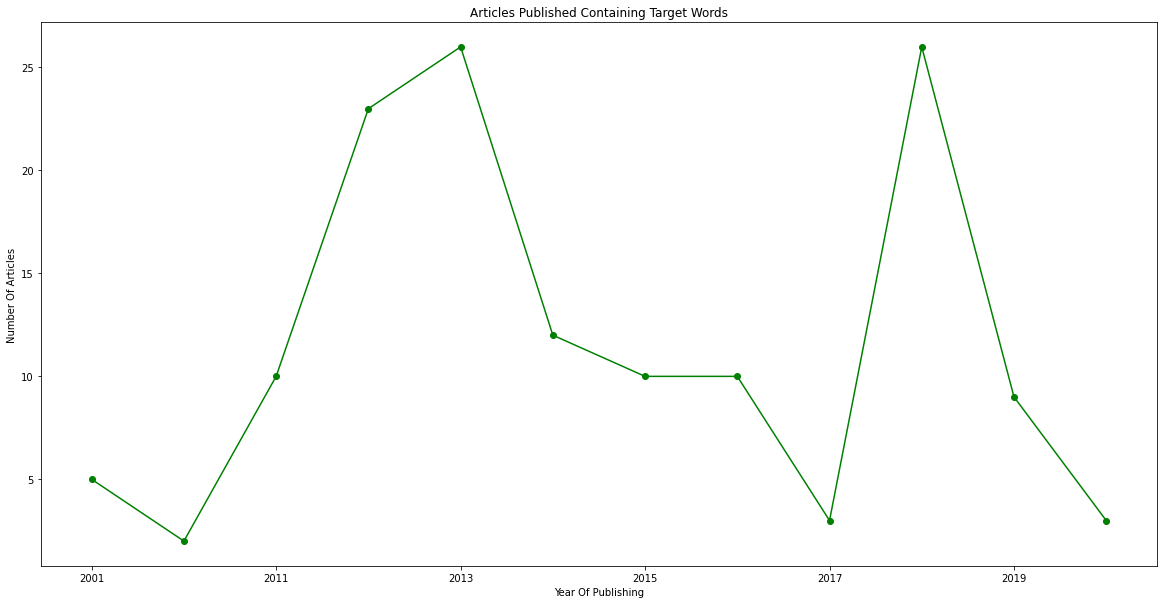

In [100]:
tar_y_ts = pd.Series(targetted_articles.groupby(['pub_y'])['headline_text'].count())
tar_y_ts.plot(kind = 'line', style = 'o-', figsize = (20,10), c = 'green')
plt.title('Articles Published Containing Target Words')
plt.ylabel('Number Of Articles')
plt.xlabel('Year Of Publishing')
plt.show()

#### Contribution Of Year To Total Number Of Articles Published In A Given Month

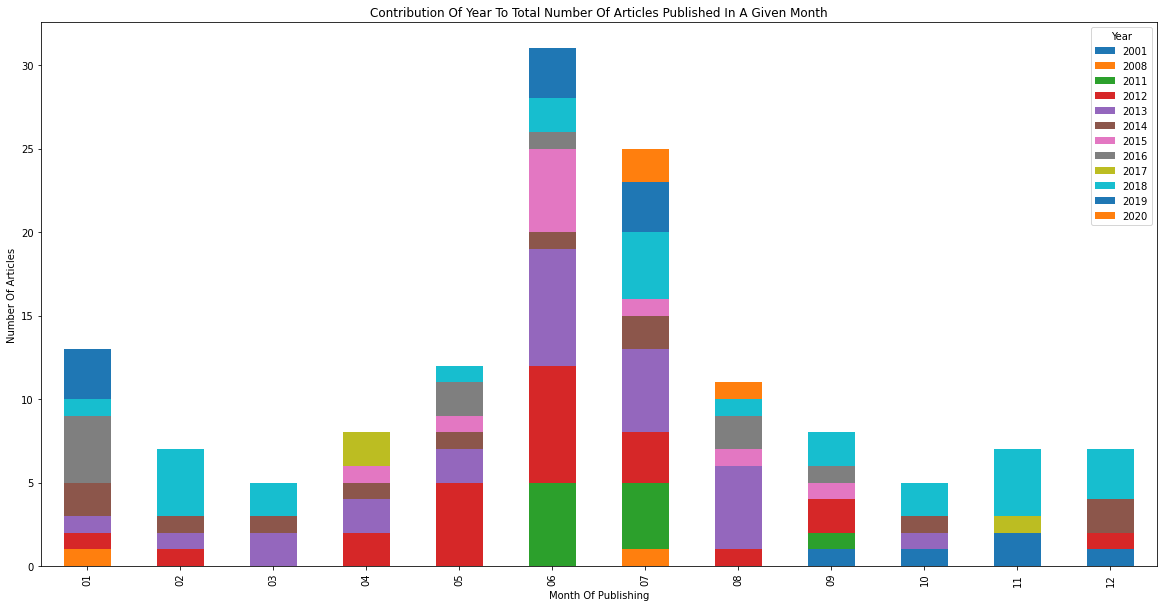

In [101]:
import matplotlib.pyplot as plt
targetted_articles.groupby(['pub_mo','pub_y'])['headline_text'].count().unstack().plot(kind = 'bar', stacked = True, figsize = (20,10))
plt.title("Contribution Of Year To Total Number Of Articles Published In A Given Month")
plt.legend(title = 'Year')
plt.ylabel('Number Of Articles')
plt.xlabel("Month Of Publishing")
plt.show()


### Generating WordCloud To Visualize The Most Used Words:

In [93]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [94]:
tar_texts = targetted_articles.headline_text.tolist()
tar_texts

['NEWSPAPER IN EDUCATIONbrIndo Pak Friendship A mission possible',
 'NEWSPAPER IN EDUCATION British School stage play on Veerappan',
 'NEWSPAPER IN EDUCATION Amity Schools celebrate their annual days',
 'NEWSPAPER IN EDUCATION',
 'NEWSPAPER IN EDUCATION',
 'Applications increasing at Lancaster',
 'JNU gears up for OBC quota implementation',
 'Quotas keep cut-offs high in city colleges',
 'PG Medical: SC extends All India quota deadline till Jun 30',
 "Stephen's gets more time for Christian quota reply",
 'Minority quota poser to 4 top Mumbai schools',
 'Counselling today for MBBS/BE special quota',
 "AU approves quota for employees' wards",
 'Quotas to aid JC aspirants in arts; commerce',
 'HRD ministry; DU spar over OBC quota in UG courses',
 "Law says no to raising MPs' quota in Kendriya Vidyalaya admissions",
 'Fight tough for admissions under sports quota at BHU',
 'Bhopal: Government to ensure 25% quota under RTE in private schools',
 'Delhi government hikes OBC quota in higher in

In [95]:
join_tar_texts = " ".join(tar_texts)
join_tar_texts

"NEWSPAPER IN EDUCATIONbrIndo Pak Friendship A mission possible NEWSPAPER IN EDUCATION British School stage play on Veerappan NEWSPAPER IN EDUCATION Amity Schools celebrate their annual days NEWSPAPER IN EDUCATION NEWSPAPER IN EDUCATION Applications increasing at Lancaster JNU gears up for OBC quota implementation Quotas keep cut-offs high in city colleges PG Medical: SC extends All India quota deadline till Jun 30 Stephen's gets more time for Christian quota reply Minority quota poser to 4 top Mumbai schools Counselling today for MBBS/BE special quota AU approves quota for employees' wards Quotas to aid JC aspirants in arts; commerce HRD ministry; DU spar over OBC quota in UG courses Law says no to raising MPs' quota in Kendriya Vidyalaya admissions Fight tough for admissions under sports quota at BHU Bhopal: Government to ensure 25% quota under RTE in private schools Delhi government hikes OBC quota in higher institutions SC upholds constitutional validity of Right to Education Act R

#### Obtaining most frequently used words in "targetted_articles" after cleaning the dataset of stopwords

In [142]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
t = join_tar_texts.split(' ')
cleaned = [i for i in t if i.lower() not in stopwords.words('english')]
freq1 = nltk.FreqDist(cleaned)
top50 = freq1.most_common(50)
top50 = pd.DataFrame(top50, columns=['Word', 'Frequency'])
top50.to_excel('Top_50_Most_Frequently_Used_Words.xlsx')
top50

[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Word,Frequency
0,quota,89
1,seats,22
2,EWS,20
3,schools,11
4,Delhi,11
5,OBC,8
6,government,8
7,Education,8
8,Act,8
9,medical,8


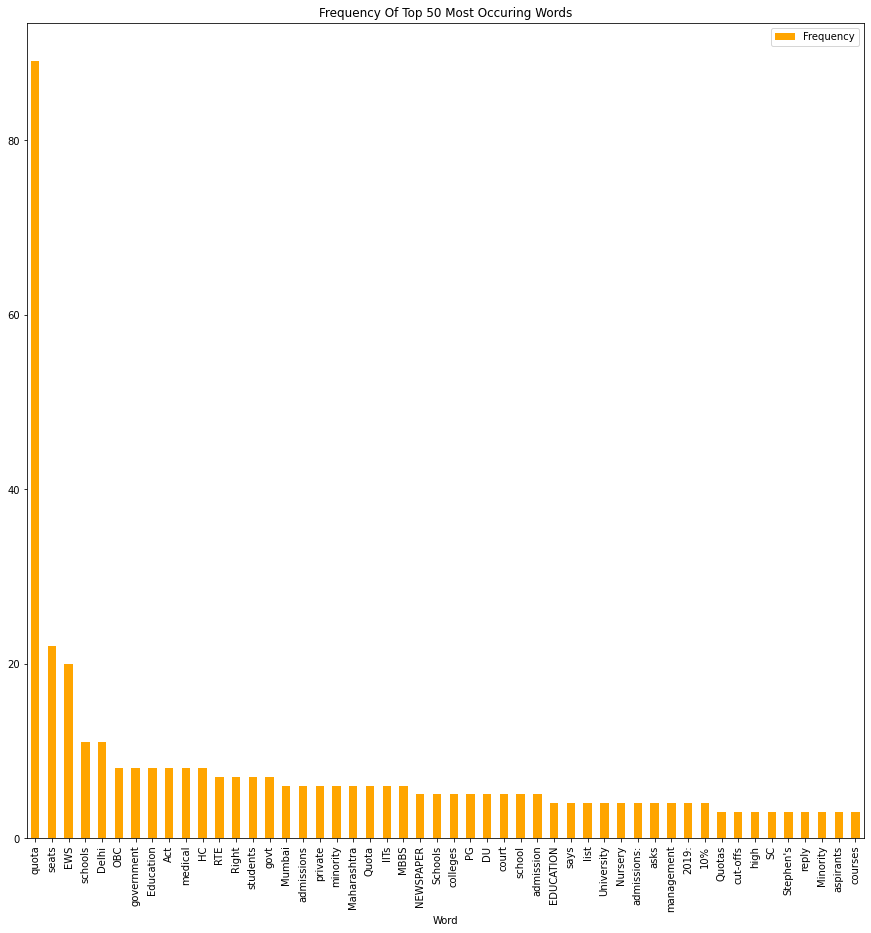

In [137]:
top50.plot(x='Word', y='Frequency', kind = 'bar', figsize = (15,15), color = 'orange')
plt.title('Frequency Of Top 50 Most Occuring Words')
plt.savefig('word_freq_top50')
plt.show()

#### WordCloud

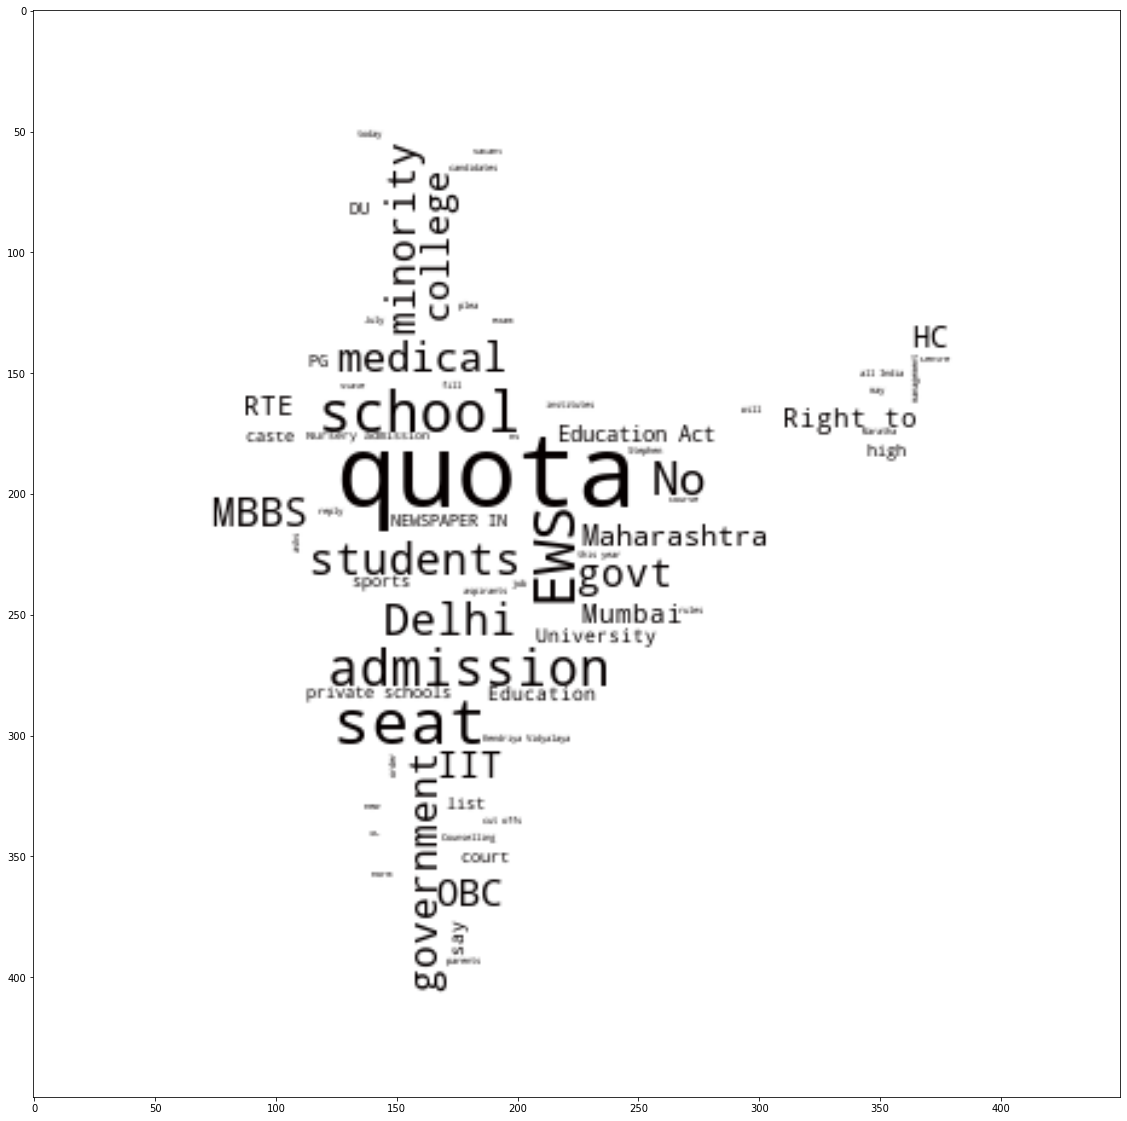

In [103]:
stopwords = set(STOPWORDS)
mask = np.array(Image.open("/Users/user/Desktop/India.PNG"))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(join_tar_texts)
plt.figure(figsize=[20,20])
wordcloud.recolor(color_func = black_color_func)
plt.imshow(wordcloud, interpolation="bilinear")
plt.savefig('IndiaEduFinal')